# Initialization

### Packages

In [1]:
Pkg.add("Distances")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Distances
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.add("Clustering")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Clustering
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
Pkg.add("QuickShiftClustering")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of QuickShiftClustering
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [4]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of LightXML...
INFO: Updating cache of IJulia...
INFO: Updating cache of Iterators...
INFO: Updating cache of Codecs...
INFO: Updating GeneratedTypes...
INFO: Updating GeneratedTables...
INFO: Updating TSne...
INFO: Updating GraphPlot...
INFO: Updating ComputeFramework...
INFO: Updating ELM...
INFO: Updating PlotlyJS...
INFO: Updating ROC...
INFO: Computing changes...
INFO: Upgrading Codecs: v0.1.5 => v0.2.0
INFO: Upgrading Discretizers: v0.2.0 => v0.3.0
INFO: Upgrading IJulia: v1.1.10 => v1.2.0
INFO: Upgrading Iterators: v0.1.9 => v0.1.10
INFO: Upgrading LightXML: v0.2.1 => v0.3.0
INFO: Building Rmath
INFO: Building WinRPM
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win32/openSUSE_13.2/repodata/repomd.xml
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win32/openSUSE_13.2/repodata/1c5e2131aa6f41f3b5a48396d8a597b03898b6db7e3

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment C:\Users\Zacharias\.julia\v0.4\Conda\deps\usr:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter-1.0.0              |           py27_3           3 KB

The following packages will be UPDATED:

    jupyter: 1.0.0-py27_2 --> 1.0.0-py27_3

Fetching packages ...
jupyter-1.0.0- 100% |###############################| Time: 0:00:00 334.13 kB/s
Extracting packages ...
[      COMPLETE      ]|##################################################| 100%
Unlinking packages ...
[      COMPLETE      ]|##################################################| 100%
Linking packages ...
[      COMPLETE      ]|##################################################| 100%


INFO: Found Jupyter version 4.1.0: C:\Users\Zacharias\.julia\v0.4\Conda\deps\usr\Scripts\jupyter
Writing IJulia kernelspec to C:\Users\Zacharias\.julia\v0.4\IJulia\deps\julia-0.4\kernel.json ...
Installing julia kernelspec julia-0.4
[InstallKernelSpec] Removing existing kernelspec in C:\Users\Zacharias\AppData\Roaming\jupyter\kernels\julia-0.4
[InstallKernelSpec] Installed kernelspec julia-0.4 in C:\Users\Zacharias\AppData\Roaming\jupyter\kernels\julia-0.4
INFO: Building LightXML
INFO: Nothing to do


In [5]:
using Distances

In [6]:
using Clustering

INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\Clustering.ji for module Clustering.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\Rmath.ji for module Rmath.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\StatsFuns.ji for module StatsFuns.


### Auxiliary Functions

In [7]:
function normalize{T<:Real}(x::Array{T,1}, method = "stat")
    # normalize a variable to the interval [0, 1] or (0, 1)

    method = lowercase(method)

    if method == "linear"
        m = minimum(x)
        y = (x - m) / (maximum(x) - m)
    elseif method == "stat"
        mx = mean(x)
        sx = std(x)
        y = (x - mx) / sx
    else
        error("invalid normalization method! Please select either ""stat"" or ""linear""!")
    end

    return y
end

function normalize{T<:Real}(X::Array{T,2}, method = "stat")
    N, n = size(X)
    Y = Array(Float64, N, n)

    for i = 1:n
        x = X[:,i]
        y = normalize(x, method)
        Y[:,i] = y
    end

    return Y
end

normalize (generic function with 4 methods)

In [8]:
function dist(X::Array{Float64,2}, x::Array{Float64,2}, i::Int64)
    d = Array(Float64, i)

    for j = 1:i
        d[j] = norm(X[j,:] - x)
    end

    return d
end

dist (generic function with 1 method)

In [9]:
function dmatrix(X::Array{Float64,2})
    N = size(X,1)
    D = zeros(N,N)

    for i = 1:(N-1)   
        i1 = i + 1
        D[i,i1:end] = dist(X[i1:end,:], X[i,:], (N - i))
        D[i1:end,i] = D[i,i1:end]
    end

    return D + D'
end

dmatrix (generic function with 1 method)

In [50]:
function sil{T <: Integer}(labels::Array{T, 1}, D::Array{Float64, 2})
    # Silhouettes metric (aka Silhouette Width) 
    
    N = length(labels)
    S = Array(Float64, N) # Silhouette values for particular data points
    
    for i = 1:N
        same = (labels .== labels[i])
        same[i] = false # exclude current data point
        other = (labels .!= labels[i])
        a = mean(D[i,same])      
        b = minimum(D[i,other])
        S[i] = (b - a) / max(a, b)
    end
    
    s = mean(S) # overall Silhouette value
    
    return s, S 
end

sil (generic function with 1 method)

# Distance Metrics

In [11]:
x = [1.0, 2.0, 3.0]
y = [-1.0, 2.5, 0.0]

3-element Array{Float64,1}:
 -1.0
  2.5
  0.0

In [12]:
d = evaluate(Euclidean(), x, y)

3.640054944640259

In [13]:
d = evaluate(Cityblock(), x, y)

5.5

In [14]:
d = evaluate(CosineDist(), x, y)

0.6029666664116279

In [15]:
d = evaluate(Jaccard(), x, y)

0.8461538461538461

# Clustering

## Methods

### K-Means

In [16]:
using Clustering

In [17]:
data = readdlm("d://data//OnlineNewsPopularity//OnlineNewsPopularity.csv", ',');

In [18]:
F = map(float, data[2:end,2:60])

39644x59 Array{Float64,2}:
 731.0  12.0   219.0  0.663594  1.0  …  -0.1875    0.0        0.1875  
 731.0   9.0   255.0  0.604743  1.0      0.0       0.5        0.0     
 731.0   9.0   211.0  0.57513   1.0      0.0       0.5        0.0     
 731.0   9.0   531.0  0.503788  1.0      0.0       0.5        0.0     
 731.0  13.0  1072.0  0.415646  1.0      0.136364  0.0454545  0.136364
 731.0  10.0   370.0  0.559889  1.0  …   0.214286  0.142857   0.214286
 731.0   8.0   960.0  0.418163  1.0      0.0       0.5        0.0     
 731.0  12.0   989.0  0.433574  1.0      0.5       0.5        0.5     
 731.0  11.0    97.0  0.670103  1.0      0.0       0.375      0.0     
 731.0  10.0   231.0  0.636364  1.0      0.0       0.5        0.0     
 731.0   9.0  1248.0  0.49005   1.0  …   0.0       0.5        0.0     
 731.0  10.0   187.0  0.666667  1.0      0.0       0.5        0.0     
 731.0   9.0   274.0  0.609195  1.0     -1.0       0.5        1.0     
   ⋮                                 ⋱            

In [19]:
F = normalize(F, "linear")

39644x59 Array{Float64,2}:
 1.0         0.47619   0.0258438  …  0.40625   0.0        0.1875  
 1.0         0.333333  0.030092      0.5       1.0        0.0     
 1.0         0.333333  0.0248997     0.5       1.0        0.0     
 1.0         0.333333  0.0626623     0.5       1.0        0.0     
 1.0         0.52381   0.126505      0.568182  0.0909091  0.136364
 1.0         0.380952  0.043663   …  0.607143  0.285714   0.214286
 1.0         0.285714  0.113288      0.5       1.0        0.0     
 1.0         0.47619   0.11671       0.75      1.0        0.5     
 1.0         0.428571  0.0114468     0.5       0.75       0.0     
 1.0         0.380952  0.0272599     0.5       1.0        0.0     
 1.0         0.333333  0.147274   …  0.5       1.0        0.0     
 1.0         0.380952  0.0220675     0.5       1.0        0.0     
 1.0         0.333333  0.0323342     0.0       1.0        1.0     
 ⋮                                ⋱                               
 0.00138313  0.619048  0.0684447   

In [20]:
Z = kmeans(F', 2)

Clustering.KmeansResult{Float64}(59x2 Array{Float64,2}:
 0.382139     0.505558   
 0.40947      0.397365   
 0.0705159    0.0628651  
 0.000728291  0.00079658 
 0.000930001  0.000963414
 0.0010232    0.00107029 
 0.0335319    0.0364152  
 0.0207853    0.03045    
 0.0222058    0.039095   
 0.0060364    0.0158159  
 0.581611     0.561264   
 0.698804     0.689563   
 0.0          0.0672584  
 ⋮                       
 0.623223     0.698079   
 0.345838     0.272281   
 0.324438     0.361769   
 0.0884394    0.0973394  
 0.698853     0.772372   
 0.747769     0.738504   
 0.439294     0.488534   
 0.906135     0.888814   
 0.243458     0.292867   
 0.514996     0.541313   
 0.722441     0.673209   
 0.127649     0.163745   ,[2,2,2,2,2,2,2,2,2,1  …  2,2,2,2,2,2,2,2,1,2],[3.67908,3.91388,3.71817,3.48113,3.94922,3.52169,4.1322,4.06038,3.38478,2.58089  …  2.89291,2.77359,2.94321,3.28736,2.71495,2.45658,3.77607,2.08861,1.46165,3.22999],[8436,31208],[8436.0,31208.0],110911.422011086,6,true)

In [21]:
labels = assignments(Z); show(labels[1:10])
c = counts(Z); show(c)
C = Z.centers; show(C[1:5,:])

[2,2,2,2,2,2,2,2,2,1][8436,31208][0.3821391822047006 0.505558031543492
 0.40946961999592846 0.39736453412433603
 0.07051594966020513 0.06286506180190116
 0.00072829082065273 0.0007965795130288157
 0.0009300011157573742 0.0009634138252223355]

### DBSCAN

In [22]:
D = dmatrix(F[1:10000,:]); # distance matrix (pairwise distances for first 10000 data points in F)

In [23]:
D[1:10,1:10]

10x10 Array{Float64,2}:
 0.0      3.94864  4.14599  2.76905  …  4.46469  4.31555  3.81211  4.3178 
 3.94864  0.0      2.70077  3.76575     4.14676  4.55785  3.36532  3.84579
 4.14599  2.70077  0.0      3.62306     3.2041   3.92133  3.54944  4.07379
 2.76905  3.76575  3.62306  0.0         3.749    4.09672  3.67218  3.18781
 3.79716  4.53629  3.72834  4.33102     3.60341  2.48664  2.57463  4.64259
 3.60809  4.32906  4.0151   3.94627  …  3.82502  2.42273  2.20086  4.2473 
 4.46469  4.14676  3.2041   3.749       0.0      3.74515  3.57713  4.22238
 4.31555  4.55785  3.92133  4.09672     3.74515  0.0      2.92036  4.45282
 3.81211  3.36532  3.54944  3.67218     3.57713  2.92036  0.0      3.89197
 4.3178   3.84579  4.07379  3.18781     4.22238  4.45282  3.89197  0.0    

In [24]:
mean(D)

4.874257821045708

In [25]:
Z = dbscan(D, 3.0, 60)

Clustering.DbscanResult([1,313],[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1],[8699,1149])

In [26]:
labels = assignments(Z); show(labels[1:10])
c = counts(Z); show(c)

[1,1,1,1,1,1,1,1,1,1][8699,1149]

### Hierarchical Clustering

In [27]:
using QuickShiftClustering
using PyPlot

INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\QuickShiftClustering.ji for module QuickShiftClustering.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\PyCall.ji for module PyCall.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\LaTeXStrings.ji for module LaTeXStrings.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\KDTrees.ji for module KDTrees.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\Devectorize.ji for module Devectorize.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\FunctionalDataUtils.ji for module FunctionalDataUtils.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\FunctionalData.ji for module FunctionalData.
INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\FactCheck.ji for module FactCheck.
INFO: Rec

In [28]:
using MultivariateStats

In [29]:
M = fit(PCA, F'; maxoutdim = 2)

PCA(indim = 59, outdim = 2, principalratio = 0.19306)

In [54]:
G = transform(M, F[1:500,:]')'

500x2 Array{Float64,2}:
 -0.533168    0.584386 
 -0.403413   -0.156891 
 -0.499464   -0.43728  
 -0.0401124   0.274606 
 -0.77428    -0.99262  
 -0.630526   -0.798575 
 -0.401091   -0.684933 
 -0.589204   -0.848625 
 -0.576909   -0.947126 
  1.05565    -0.33847  
  0.734312   -0.137645 
 -0.330835   -0.699345 
 -0.392602   -0.077567 
  ⋮                    
 -0.204093   -0.0270889
  0.664515   -0.129602 
 -0.296511   -0.58733  
  0.992545   -0.231196 
 -0.480629   -1.25395  
 -0.465165   -1.11811  
 -0.598537   -0.084546 
 -0.216255    0.361288 
  0.926683   -0.357506 
 -0.450198    0.233885 
 -0.456639   -0.198447 
 -0.318118    0.250468 

In [55]:
Z = quickshift(G')

QuickShiftClustering.QuickShift(104,[Any[],Any[(0.10847624f0,70),(0.034176994f0,112),(0.059333604f0,396),(0.2889811f0,481)],Any[(0.054553565f0,417),(0.08732781f0,441)],Any[],Any[(0.01852951f0,20)],Any[(0.13567832f0,292),(0.022923734f0,299),(0.06822841f0,392)],Any[(0.022824246f0,391),(0.019982692f0,480)],Any[(0.046230927f0,154)],Any[(0.025192859f0,23),(0.017019311f0,53)],Any[(0.033589464f0,381)]  …  Any[(0.2045096f0,76),(0.08401168f0,129),(0.04043319f0,188),(0.08615068f0,203)],Any[],Any[],Any[(0.013327682f0,347)],Any[],Any[],Any[(0.012390504f0,434)],Any[],Any[(0.01991819f0,94),(0.024155818f0,460)],Any[]],0.008133243f0)

In [56]:
labels = quickshiftlabels(Z);

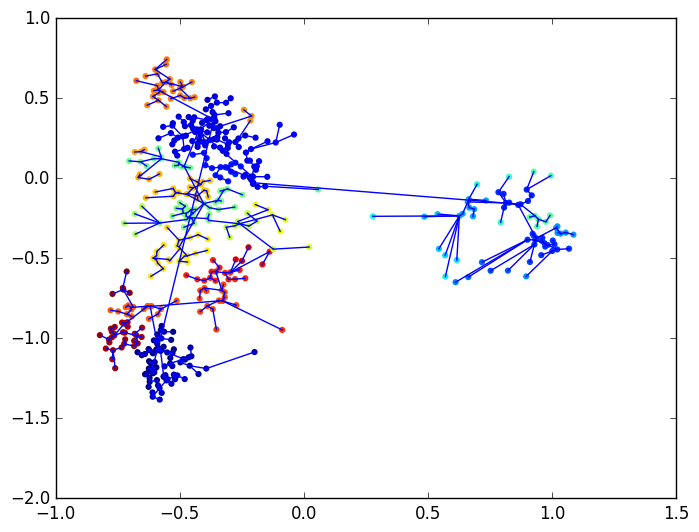

PyObject <matplotlib.collections.PathCollection object at 0x0000000031E332E8>

In [57]:
quickshiftplot(Z, G', labels)

## Validation Metrics

### Silhouettes

In [60]:
Z = kmeans(F', 2);
labels = assignments(Z);

In [64]:
sil(labels[1:10000], D)

(-0.31056229825747034,[-0.253856,-0.321978,-0.32094,-0.361765,-0.260788,-0.244776,-0.326319,-0.252324,-0.2678,-0.241989  …  -0.259161,-0.23299,-0.282215,-0.342993,-0.281311,-0.243912,-0.391512,-0.292525,-0.328353,-0.386368])